In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#ingestingdata
test_df = pd.read_csv('fraudTest.csv')
train_df = pd.read_csv('fraudTrain.csv')

DATA MODIFICATION

In [2]:
#aim = Understanding relevance of features as per our prob state
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


*dropping columns*

In [3]:
#designing this ML model, Consideration = columns first, last, street, cc_num and trans_num
#irrelevation to crack any pattern in transac as per the information provided about columns
train_df = train_df.drop(["first", "last", "street", "cc_num", "trans_num"], axis=1)
test_df = test_df.drop(["first", "last", "street", "cc_num", "trans_num"], axis=1)

In [4]:
# Dropping unnecessary columns:
# - 'unnamed:0' is redundant as it is equivalent to the index column.
# - 'unix_time' is not needed since the transaction date and time are already in a separate column.
train_df.drop(["unix_time", "Unnamed: 0"], inplace=True, axis=1)
test_df.drop(["unix_time","Unnamed: 0"], inplace=True, axis=1)

In [5]:
test_df.dropna(inplace=True)
train_df.dropna(inplace=True)

In [6]:
test_df.isna().sum()

,0
trans_date_trans_time,0
merchant,0
category,0
amt,0
gender,0
city,0
state,0
zip,0
lat,0
long,0


In [7]:
#row 128199 containing data that has missing values, we could drop that entry using the above cell approach
train_df["dob"] = pd.to_datetime(train_df["dob"])
test_df["dob"] = pd.to_datetime(test_df["dob"])

In [8]:
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])

train_df['age'] = (train_df['trans_date_trans_time'] - train_df['dob']).dt.days / 365.25
test_df['age'] = (test_df['trans_date_trans_time'] - test_df['dob']).dt.days / 365.25


train_df['age'] = train_df['age'].astype(int, errors='ignore')
test_df['age'] = test_df['age'].astype(int, errors='ignore')

In [9]:
#Hour column
train_df["hour"] = train_df["trans_date_trans_time"].dt.hour
test_df["hour"] = test_df["trans_date_trans_time"].dt.hour
train_df[~train_df.trans_date_trans_time.dt.year == 2019]
#Output from above proves that all entries are to be examined from 2019, we will not have separate columnn for year

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,age,hour


In [10]:
#Day of week col
train_df["day_of_week"] = train_df["trans_date_trans_time"].dt.dayofweek
test_df["day_of_week"] = test_df["trans_date_trans_time"].dt.dayofweek
#Month col
train_df["month"] =train_df["trans_date_trans_time"].dt.month
test_df["month"] =test_df["trans_date_trans_time"].dt.month
#dropping trans column
train_df = train_df.drop("trans_date_trans_time", axis=1)
test_df = test_df.drop("trans_date_trans_time", axis=1)

In [11]:
train_df.drop("dob", inplace=True, axis=1)
test_df.drop("dob", inplace=True, axis=1)
train_df['gender'] = train_df['gender'].map({"F":0, "M":1})
test_df['gender'] = test_df['gender'].map({"F":0, "M":1})

In [12]:
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
train_df.shape, test_df.shape

((511636, 18), (499997, 18))

In [13]:
train_df.drop(['city', 'state'], axis = 1, inplace = True)
test_df.drop(['city', 'state'], axis = 1, inplace = True)
# reason to drop the cols = *city_pop column, which represents the population of the city, provides a more relevant numerical feature for the model
# *distance_to_merch are likely more informative

In [14]:
# performing target guided ordinal encoding on category column
train_df_af = train_df.groupby('category')['is_fraud'].mean().to_dict()
test_df_af = test_df.groupby('category')['is_fraud'].mean().to_dict()
train_df['category'] = train_df['category'].map(train_df_af)
test_df['category'] = test_df['category'].map(test_df_af)

In [15]:
# performing target guided ordinal encoding on job column
train_df_af = train_df.groupby('job')['is_fraud'].mean().to_dict()
test_df_af = test_df.groupby('job')['is_fraud'].mean().to_dict()
train_df['job'] = train_df['job'].map(train_df_af)
test_df['job'] = test_df['job'].map(test_df_af)

In [16]:
train_df['is_fraud'].value_counts()

,count
is_fraud,
0.0,508566
1.0,3070


In [17]:
train_df.drop('merchant', axis = 1, inplace = True)
test_df.drop('merchant', axis = 1, inplace = True)

In [18]:
from sklearn.utils import resample
# Separate majority and minority classes
majority_cl = train_df[train_df['is_fraud'] == 0]
re_df = resample(majority_cl, replace=True, n_samples=778005, random_state=2)

In [19]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate majority and minority classes
majority_cl = train_df[train_df['is_fraud'] == 0]
minority_cl_df = train_df[train_df['is_fraud'] == 1]

# Resample the majority class
resampled_majority_cl = resample(majority_cl, replace=True, n_samples=778005, random_state=2)

# Separate features and target for SMOTE - Keep location columns for distance calculation later
X = train_df.drop('is_fraud', axis=1)
y = train_df['is_fraud']

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy = {1 : 518670}, random_state = 2)
X_smote, y_smote = smote.fit_resample(X, y)

# Separate the SMOTE-d minority class data from the resampled dataset
smote_minority_df = pd.DataFrame(X_smote, columns=X.columns)
smote_minority_df['is_fraud'] = y_smote
smote_minority_cl = smote_minority_df[smote_minority_df['is_fraud'] == 1]

# Combine the resampled majority class and the SMOTE-d minority class
s_train_df_resampled = pd.concat([resampled_majority_cl, smote_minority_cl])

# Display the new class counts
print(s_train_df_resampled['is_fraud'].value_counts())

is_fraud
0.0    778005
1.0    518670
Name: count, dtype: int64


In [20]:
s_train_df_resampled.columns

Index(['category', 'amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'job',
       'merch_lat', 'merch_long', 'is_fraud', 'age', 'hour', 'day_of_week',
       'month'],
      dtype='object')

In [21]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1_rad, lon1_rad, lat2_rad, lon2_rad = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = np.sin(dlat/2.0)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Calculate distance on original dataframes
train_df['distance_to_merch'] = haversine_distance(train_df['lat'], train_df['long'], train_df['merch_lat'], train_df['merch_long'])
test_df['distance_to_merch'] = haversine_distance(test_df['lat'], test_df['long'], test_df['merch_lat'], test_df['merch_long'])

# Calculate distance on the resampled dataframe
s_train_df_resampled['distance_to_merch'] = haversine_distance(s_train_df_resampled['lat'], s_train_df_resampled['long'], s_train_df_resampled['merch_lat'], s_train_df_resampled['merch_long'])

In [22]:
s_train_df_resampled.dtypes

,0
category,float64
amt,float64
gender,int64
zip,float64
lat,float64
long,float64
city_pop,float64
job,float64
merch_lat,float64
merch_long,float64


STANDARDISING FEATURES

In [23]:
X = s_train_df_resampled.drop('is_fraud', axis=1)
y = s_train_df_resampled['is_fraud']
X_train = X
y_train = y
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

In [24]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit_transform(X_train)
imp.fit_transform(X_test)

array([[1.92973495e-03, 2.86000000e+00, 1.00000000e+00, ...,
        6.00000000e+00, 6.00000000e+00, 2.45614617e+01],
       [1.92973495e-03, 2.98400000e+01, 0.00000000e+00, ...,
        6.00000000e+00, 6.00000000e+00, 1.04925092e+02],
       [1.57762204e-03, 4.12800000e+01, 0.00000000e+00, ...,
        6.00000000e+00, 6.00000000e+00, 5.90800777e+01],
       ...,
       [1.49649876e-03, 1.22010000e+02, 0.00000000e+00, ...,
        6.00000000e+00, 1.20000000e+01, 6.52070761e+00],
       [2.99530998e-03, 7.66500000e+01, 1.00000000e+00, ...,
        6.00000000e+00, 1.20000000e+01, 1.26621994e+02],
       [1.01579659e-02, 6.62500000e+01, 1.00000000e+00, ...,
        6.00000000e+00, 1.20000000e+01, 8.13926184e+01]])

In [25]:
# Droppin original lat/long and merch_lat/merch_long columns from original dataframes
train_df.drop(['lat', 'long', 'merch_lat', 'merch_long'], axis=1, inplace=True)
test_df.drop(['lat', 'long', 'merch_lat', 'merch_long'], axis=1, inplace=True)
s_train_df_resampled.drop(['lat', 'long', 'merch_lat', 'merch_long'], axis=1, inplace=True)

In [26]:
#standardising features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1. logistic regression


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
mLR = LogisticRegression()
mLR.fit(X_train, y_train)
y_pred_lr = mLR.predict(X_test)
y_pred_lr

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
mLR.predict_proba(X_test)

array([[0.95001408, 0.04998592],
       [0.9794783 , 0.0205217 ],
       [0.89153466, 0.10846534],
       ...,
       [0.54976351, 0.45023649],
       [0.99276197, 0.00723803],
       [0.95464365, 0.04535635]])

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score
print('ACCURACY SCORE')
print(accuracy_score(y_test, y_pred_lr))
print('\n')
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, y_pred_lr))
print('\n')
print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred_lr))

ACCURACY SCORE
0.9786638719832319


CONFUSION MATRIX
[[488003   9870]
 [   798   1326]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    497873
         1.0       0.12      0.62      0.20      2124

    accuracy                           0.98    499997
   macro avg       0.56      0.80      0.59    499997
weighted avg       0.99      0.98      0.99    499997



2. Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
mDT = DecisionTreeClassifier()
mDT.fit(X_train, y_train)
y_pred = mDT.predict(X_test)

In [31]:

print('ACCURACY SCORE')
print(accuracy_score(y_test, y_pred))
print('\n')
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred))

ACCURACY SCORE
0.8115208691252147


CONFUSION MATRIX
[[404064  93809]
 [   430   1694]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90    497873
         1.0       0.02      0.80      0.03      2124

    accuracy                           0.81    499997
   macro avg       0.51      0.80      0.47    499997
weighted avg       0.99      0.81      0.89    499997



3. random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
mRF = RandomForestClassifier()
X_train = X_train.astype(int)
X_test = X_test.astype(int)
mRF.fit(X_train, y_train)
y_pred = mRF.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
print('ACCURACY SCORE')
print(accuracy_score(y_test, y_pred))
print('\n')
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('CLASSIFICATION REPORT')

print(classification_report(y_test, y_pred))

ACCURACY SCORE
0.9593117558705352


CONFUSION MATRIX
[[478852  19021]
 [  1323    801]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    497873
         1.0       0.04      0.38      0.07      2124

    accuracy                           0.96    499997
   macro avg       0.52      0.67      0.53    499997
weighted avg       0.99      0.96      0.98    499997



IMPROVEMENTS TO THE MODEL


In [34]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

In [35]:
from sklearn.model_selection import GridSearchCV

grid_search_lr = GridSearchCV(mLR, param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Best parameters for Logistic Regression: {'C': 0.1}


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)
y_proba_lr = best_lr_model.predict_proba(X_test)[:, 1]

print("LOGISTIC REG")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba_lr):.4f}")

LOGISTIC REG
Accuracy: 0.9914
Precision: 0.2360
Recall: 0.4553
F1-score: 0.3109
AUC: 0.7565


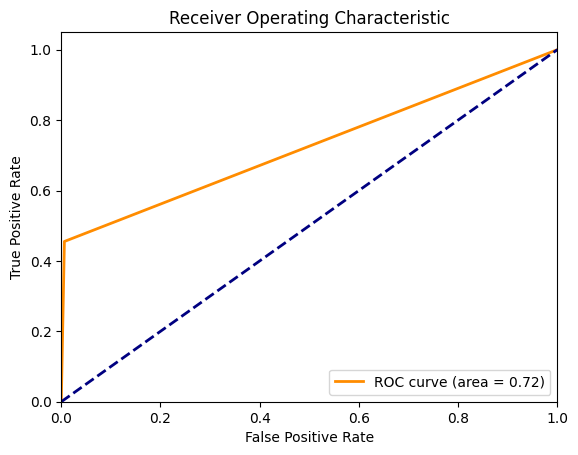

AUC: 0.7244931629358446


In [37]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)